In [27]:
from pathlib import Path

import tensorflow as tf
import numpy as np

data_dir = Path("data/cards/kind/")

batch_size = 4
img_size = (128, 128)

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)
# train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)
# val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 480 files belonging to 20 classes.
Using 384 files for training.
Found 480 files belonging to 20 classes.
Using 384 files for training.


In [28]:
import math

num_classes = 20

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(),
    # tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomRotation(math.pi),
    tf.keras.layers.RandomZoom((-0.2, 0.2)),
    tf.keras.layers.RandomContrast(0.2),
])

model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/10
96/96 [==============================] - 6s 46ms/step - loss: 3.0158 - accuracy: 0.0521 - val_loss: 2.9949 - val_accuracy: 0.0521
Epoch 2/10
96/96 [==============================] - 4s 44ms/step - loss: 2.9973 - accuracy: 0.0443 - val_loss: 2.9870 - val_accuracy: 0.0573
Epoch 3/10
96/96 [==============================] - 4s 42ms/step - loss: 3.0008 - accuracy: 0.0599 - val_loss: 2.9904 - val_accuracy: 0.0755
Epoch 4/10
96/96 [==============================] - 4s 42ms/step - loss: 2.9951 - accuracy: 0.0911 - val_loss: 2.9856 - val_accuracy: 0.0729
Epoch 5/10
96/96 [==============================] - 4s 43ms/step - loss: 2.9815 - accuracy: 0.0781 - val_loss: 2.9605 - val_accuracy: 0.1615
Epoch 6/10
96/96 [==============================] - 4s 42ms/step - loss: 2.9278 - accuracy: 0.1302 - val_loss: 2.8786 - val_accuracy: 0.1641
Epoch 7/10
96/96 [==============================] - 4s 42ms/step - loss: 2.8771 - accuracy: 0.1302 - val_loss: 2.8910 - val_accuracy: 0.1328
Epoch 8/10
96

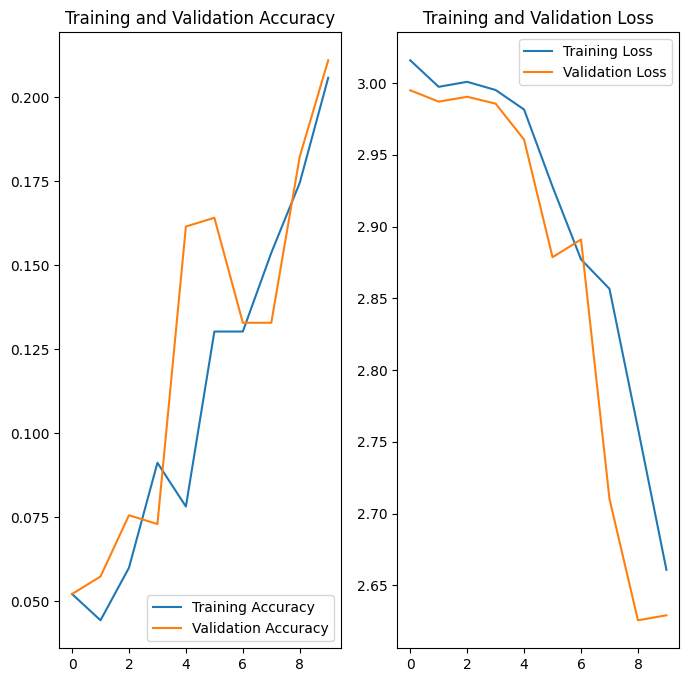

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
img = tf.keras.utils.load_img(
    "data/cards/kind/planeswalker/601541cc01044830a7c647451f55f620.jpg", target_size=img_size,
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(score), 100 * np.max(score))
)


1/1 [==============================] - 0s 64ms/step
This image most likely belongs to 12 with a 27.32 percent confidence.
